# RBE 549 - Computer Vision Final Project
# Object Detection Using YOLO Algorithm
## ------------------------------------Submitted by Team H

# Team Members' Names
> ### Kshitij Sharma (ksharma@wpi.edu)
> ### Jasmandeep Singh Narang (jsnarang@wpi.edu)
> ### Shubham Malhotra(smalhotra@wpi.edu)

This project uses the YOLO algorithm to train the yolov5 model on the image dataset that has been created using images from the world wide web. The steps taken for the begining to the end of the project are as follows:
1.	Procuring the Basketball Image Dataset.
2.	Labelling the Images
3.	Use pyTorch to install the yolov5 model.
4.	Train the model on the images from the dataset.
5.	Test the model to detect basketball from images and videos.
6.	Test the model for realtime object detection.
7.	Collect the results.
8.	Manipulate the dataset and other parameters to check behaviour of the model.
9.	Publish those results.


# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------Here We Begin The Code------------------------------------------
# ---------------------------------------------------------------------------------------------------------------


# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load YOLO Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

# 3. Make Detection with General Images

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train From Scratch

In [4]:
import os
import time

In [10]:
# For training the model on the custom dataset. 100 epochs take almost 35 minutes.

start_time1 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_10-90.yaml --weights yolov5m.pt --workers 2 --device 0
end_time1 = time.time()
duration1 = end_time1 - start_time1
print(f"Duration1 is {duration1}")

start_time2 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_20-80.yaml --weights yolov5m.pt --workers 2 --device 0
end_time2 = time.time()
duration2 = end_time2 - start_time2
print(f"Duration2 is {duration2}")

start_time3 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_30-70.yaml --weights yolov5m.pt --workers 2 --device 0
end_time3 = time.time()
duration3 = end_time3 - start_time3
print(f"Duration3 is {duration3}")

start_time4 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_40-60.yaml --weights yolov5m.pt --workers 2 --device 0
end_time4 = time.time()
duration4 = end_time4 - start_time4
print(f"Duration4 is {duration4}")


github: up to date with https://github.com/ultralytics/yolov5 
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp21\weights\last.pt, 42.1MB
Optimizer stripped from runs\train\exp21\weights\best.pt, 42.1MBDuration3 is 704.8569579124451


train: weights=yolov5m.pt, cfg=, data=dataset_30-70.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-12-15 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3060 Laptop GPU, 6144MiB)



hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      5280  models.common.Conv                      [3, 48, 6, 2, 2]              
  1                -1  1     41664  models.common.Conv                      [48, 96, 3, 2]                
  2                -1  2     65280  models.common.C3                        [96, 96, 2]                   
  3                -1  1    166272  models.common.Conv

     19/29     2.28G    0.0291  0.009604         0        44       320:  22%|##1       | 10/46 [00:01<00:09,  3.88it/s]
     19/29     2.28G   0.02974  0.009845         0        46       320:  22%|##1       | 10/46 [00:02<00:09,  3.88it/s]
     19/29     2.28G   0.02974  0.009845         0        46       320:  24%|##3       | 11/46 [00:02<00:08,  4.33it/s]
     19/29     2.28G   0.02989  0.009851         0        40       320:  24%|##3       | 11/46 [00:02<00:08,  4.33it/s]
     19/29     2.28G   0.02989  0.009851         0        40       320:  26%|##6       | 12/46 [00:02<00:09,  3.53it/s]
     19/29     2.28G   0.03008  0.009837         0        41       320:  26%|##6       | 12/46 [00:02<00:09,  3.53it/s]
     19/29     2.28G   0.03008  0.009837         0        41       320:  28%|##8       | 13/46 [00:02<00:07,  4.19it/s]
     19/29     2.28G   0.03042   0.01001         0        52       320:  28%|##8       | 13/46 [00:03<00:07,  4.19it/s]
     19/29     2.28G   0.03042   0.01001

github: up to date with https://github.com/ultralytics/yolov5 
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp22\weights\last.pt, 42.1MB
Optimizer stripped from runs\train\exp22\weights\best.pt, 42.1MB
Duration4 is 774.4373784065247


train: weights=yolov5m.pt, cfg=, data=dataset_40-60.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-12-15 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, 

      3/29     2.41G   0.05768    0.0184         0        50       320:  39%|###9      | 24/61 [00:06<00:09,  3.74it/s]
      3/29     2.41G   0.05768    0.0184         0        50       320:  41%|####      | 25/61 [00:06<00:09,  3.95it/s]
      3/29     2.41G   0.05754   0.01835         0        42       320:  41%|####      | 25/61 [00:06<00:09,  3.95it/s]
      3/29     2.41G   0.05754   0.01835         0        42       320:  43%|####2     | 26/61 [00:06<00:08,  4.00it/s]
      3/29     2.41G   0.05729   0.01823         0        33       320:  43%|####2     | 26/61 [00:06<00:08,  4.00it/s]
      3/29     2.41G   0.05729   0.01823         0        33       320:  44%|####4     | 27/61 [00:06<00:09,  3.50it/s]
      3/29     2.41G   0.05711   0.01807         0        32       320:  44%|####4     | 27/61 [00:06<00:09,  3.50it/s]
      3/29     2.41G   0.05711   0.01807         0        32       320:  46%|####5     | 28/61 [00:06<00:08,  3.94it/s]
      3/29     2.41G    0.0571   0.01802

      5/29     2.41G   0.04671   0.01499         0        45       320:  49%|####9     | 30/61 [00:08<00:07,  4.28it/s]
      5/29     2.41G   0.04671   0.01499         0        45       320:  51%|#####     | 31/61 [00:08<00:08,  3.74it/s]
      5/29     2.41G   0.04668   0.01498         0        39       320:  51%|#####     | 31/61 [00:08<00:08,  3.74it/s]
      5/29     2.41G   0.04668   0.01498         0        39       320:  52%|#####2    | 32/61 [00:08<00:06,  4.15it/s]
      5/29     2.41G   0.04676   0.01497         0        41       320:  52%|#####2    | 32/61 [00:08<00:06,  4.15it/s]
      5/29     2.41G   0.04676   0.01497         0        41       320:  54%|#####4    | 33/61 [00:08<00:07,  3.69it/s]
      5/29     2.41G   0.04677   0.01493         0        40       320:  54%|#####4    | 33/61 [00:08<00:07,  3.69it/s]
      5/29     2.41G   0.04677   0.01493         0        40       320:  56%|#####5    | 34/61 [00:08<00:06,  4.11it/s]
      5/29     2.41G   0.04675    0.0149

     16/29     2.41G   0.02982   0.01012         0        36       320:  93%|#########3| 57/61 [00:14<00:00,  4.17it/s]
     16/29     2.41G    0.0298   0.01013         0        42       320:  93%|#########3| 57/61 [00:14<00:00,  4.17it/s]
     16/29     2.41G    0.0298   0.01013         0        42       320:  95%|#########5| 58/61 [00:14<00:00,  3.50it/s]
     16/29     2.41G   0.02975   0.01011         0        34       320:  95%|#########5| 58/61 [00:14<00:00,  3.50it/s]
     16/29     2.41G   0.02975   0.01011         0        34       320:  97%|#########6| 59/61 [00:14<00:00,  4.19it/s]
     16/29     2.41G   0.02979   0.01012         0        45       320:  97%|#########6| 59/61 [00:15<00:00,  4.19it/s]
     16/29     2.41G   0.02979   0.01012         0        45       320:  98%|#########8| 60/61 [00:15<00:00,  3.59it/s]
     16/29     2.41G   0.02983   0.01014         0        43       320:  98%|#########8| 60/61 [00:15<00:00,  3.59it/s]
     16/29     2.41G   0.02983   0.01014

     19/29     2.41G    0.0244  0.009471         0        54       320:  67%|######7   | 41/61 [00:10<00:05,  3.58it/s]
     19/29     2.41G   0.02441  0.009514         0        55       320:  67%|######7   | 41/61 [00:10<00:05,  3.58it/s]
     19/29     2.41G   0.02441  0.009514         0        55       320:  69%|######8   | 42/61 [00:10<00:04,  4.04it/s]
     19/29     2.41G   0.02432  0.009456         0        34       320:  69%|######8   | 42/61 [00:10<00:04,  4.04it/s]
     19/29     2.41G   0.02432  0.009456         0        34       320:  70%|#######   | 43/61 [00:10<00:05,  3.18it/s]
     19/29     2.41G   0.02442  0.009446         0        44       320:  70%|#######   | 43/61 [00:11<00:05,  3.18it/s]
     19/29     2.41G   0.02442  0.009446         0        44       320:  72%|#######2  | 44/61 [00:11<00:04,  3.80it/s]
     19/29     2.41G   0.02444  0.009481         0        50       320:  72%|#######2  | 44/61 [00:11<00:04,  3.80it/s]
     19/29     2.41G   0.02444  0.009481

     22/29     2.41G   0.02138  0.008152         0        40       320:  41%|####      | 25/61 [00:06<00:09,  3.91it/s]
     22/29     2.41G   0.02138  0.008152         0        40       320:  43%|####2     | 26/61 [00:06<00:08,  4.19it/s]
     22/29     2.41G   0.02132  0.008244         0        50       320:  43%|####2     | 26/61 [00:06<00:08,  4.19it/s]
     22/29     2.41G   0.02132  0.008244         0        50       320:  44%|####4     | 27/61 [00:06<00:09,  3.46it/s]
     22/29     2.41G   0.02142  0.008261         0        51       320:  44%|####4     | 27/61 [00:06<00:09,  3.46it/s]
     22/29     2.41G   0.02142  0.008261         0        51       320:  46%|####5     | 28/61 [00:06<00:08,  3.80it/s]
     22/29     2.41G   0.02131  0.008299         0        42       320:  46%|####5     | 28/61 [00:07<00:08,  3.80it/s]
     22/29     2.41G   0.02131  0.008299         0        42       320:  48%|####7     | 29/61 [00:07<00:08,  3.79it/s]
     22/29     2.41G   0.02137  0.008285

In [13]:
start_time5 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_50-50.yaml --weights yolov5m.pt --workers 2 --device 0
end_time5 = time.time()
duration5 = end_time5 - start_time5
print(f"Duration5 is {duration5}")

start_time6 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_60-40.yaml --weights yolov5m.pt --workers 2 --device 0
end_time6 = time.time()
duration6 = end_time6 - start_time6
print(f"Duration6 is {duration6}")

start_time7 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_70-30.yaml --weights yolov5m.pt --workers 2 --device 0
end_time7 = time.time()
duration7 = end_time7 - start_time7
print(f"Duration7 is {duration7}")

start_time8 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_80-20.yaml --weights yolov5m.pt --workers 2 --device 0
end_time8 = time.time()
duration8 = end_time8 - start_time8
print(f"Duration8 is {duration8}")

start_time9 = time.time()
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 30 --data dataset_90-10.yaml --weights yolov5m.pt --workers 2 --device 0
end_time9 = time.time()
duration9 = end_time9 - start_time9
print(f"Duration9 is {duration9}")

github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp28\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp28\weights\best.pt, 14.3MB
Duration9 is 1007.1055767536163


train: weights=yolov5s.pt, cfg=, data=dataset_90-10.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   c9a46a6..b7d18f3  master     -> origin/master
YOLOv5  2021-12-15 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

      0/29    0.862G    0.1106     0.017         0        29       320:  40%|###9      | 55/138 [00:14<00:17,  4.67it/s]
      0/29    0.862G    0.1103   0.01702         0        35       320:  40%|###9      | 55/138 [00:14<00:17,  4.67it/s]
      0/29    0.862G    0.1103   0.01702         0        35       320:  41%|####      | 56/138 [00:14<00:16,  5.06it/s]
      0/29    0.862G    0.1101   0.01704         0        31       320:  41%|####      | 56/138 [00:14<00:16,  5.06it/s]
      0/29    0.862G    0.1101   0.01704         0        31       320:  41%|####1     | 57/138 [00:14<00:19,  4.14it/s]
      0/29    0.862G    0.1099   0.01707         0        44       320:  41%|####1     | 57/138 [00:15<00:19,  4.14it/s]
      0/29    0.862G    0.1099   0.01707         0        44       320:  42%|####2     | 58/138 [00:15<00:16,  4.75it/s]
      0/29    0.862G    0.1097    0.0171         0        33       320:  42%|####2     | 58/138 [00:15<00:16,  4.75it/s]
      0/29    0.862G    0.1097  

      3/29      1.3G    0.0465   0.01468         0        48       320:  25%|##4       | 34/138 [00:07<00:23,  4.43it/s]
      3/29      1.3G   0.04659   0.01462         0        36       320:  25%|##4       | 34/138 [00:07<00:23,  4.43it/s]
      3/29      1.3G   0.04659   0.01462         0        36       320:  25%|##5       | 35/138 [00:07<00:26,  3.88it/s]
      3/29      1.3G   0.04671   0.01455         0        38       320:  25%|##5       | 35/138 [00:07<00:26,  3.88it/s]
      3/29      1.3G   0.04671   0.01455         0        38       320:  26%|##6       | 36/138 [00:07<00:21,  4.68it/s]
      3/29      1.3G   0.04673   0.01454         0        37       320:  26%|##6       | 36/138 [00:08<00:21,  4.68it/s]
      3/29      1.3G   0.04673   0.01454         0        37       320:  27%|##6       | 37/138 [00:08<00:25,  3.94it/s]
      3/29      1.3G   0.04659   0.01457         0        46       320:  27%|##6       | 37/138 [00:08<00:25,  3.94it/s]
      3/29      1.3G   0.04659  

     10/29      1.3G   0.03024   0.01058         0        31       320:   9%|9         | 13/138 [00:02<00:26,  4.72it/s]
     10/29      1.3G   0.03003   0.01046         0        36       320:   9%|9         | 13/138 [00:02<00:26,  4.72it/s]
     10/29      1.3G   0.03003   0.01046         0        36       320:  10%|#         | 14/138 [00:02<00:35,  3.54it/s]
     10/29      1.3G   0.03031   0.01043         0        39       320:  10%|#         | 14/138 [00:02<00:35,  3.54it/s]
     10/29      1.3G   0.03031   0.01043         0        39       320:  11%|#         | 15/138 [00:02<00:28,  4.32it/s]
     10/29      1.3G   0.03024   0.01041         0        37       320:  11%|#         | 15/138 [00:03<00:28,  4.32it/s]
     10/29      1.3G   0.03024   0.01041         0        37       320:  12%|#1        | 16/138 [00:03<00:27,  4.39it/s]
     10/29      1.3G   0.03013   0.01028         0        35       320:  12%|#1        | 16/138 [00:03<00:27,  4.39it/s]
     10/29      1.3G   0.03013  

     11/29      1.3G   0.02933   0.01061         0        30       320:  84%|########4 | 116/138 [00:26<00:04,  4.60it/s]
     11/29      1.3G   0.02933   0.01061         0        30       320:  85%|########4 | 117/138 [00:26<00:05,  3.66it/s]
     11/29      1.3G   0.02934   0.01061         0        45       320:  85%|########4 | 117/138 [00:26<00:05,  3.66it/s]
     11/29      1.3G   0.02934   0.01061         0        45       320:  86%|########5 | 118/138 [00:26<00:04,  4.33it/s]
     11/29      1.3G   0.02934   0.01063         0        44       320:  86%|########5 | 118/138 [00:26<00:04,  4.33it/s]
     11/29      1.3G   0.02934   0.01063         0        44       320:  86%|########6 | 119/138 [00:26<00:04,  3.87it/s]
     11/29      1.3G   0.02936   0.01062         0        34       320:  86%|########6 | 119/138 [00:26<00:04,  3.87it/s]
     11/29      1.3G   0.02936   0.01062         0        34       320:  87%|########6 | 120/138 [00:26<00:04,  4.45it/s]
     11/29      1.3G   0

     13/29      1.3G   0.02745   0.01018         0        32       320:  54%|#####3    | 74/138 [00:16<00:15,  4.16it/s]
     13/29      1.3G   0.02744   0.01014         0        35       320:  54%|#####3    | 74/138 [00:16<00:15,  4.16it/s]
     13/29      1.3G   0.02744   0.01014         0        35       320:  54%|#####4    | 75/138 [00:16<00:13,  4.76it/s]
     13/29      1.3G   0.02745   0.01013         0        45       320:  54%|#####4    | 75/138 [00:16<00:13,  4.76it/s]
     13/29      1.3G   0.02745   0.01013         0        45       320:  55%|#####5    | 76/138 [00:16<00:16,  3.70it/s]
     13/29      1.3G   0.02746   0.01013         0        34       320:  55%|#####5    | 76/138 [00:17<00:16,  3.70it/s]
     13/29      1.3G   0.02746   0.01013         0        34       320:  56%|#####5    | 77/138 [00:17<00:13,  4.49it/s]
     13/29      1.3G   0.02747   0.01011         0        32       320:  56%|#####5    | 77/138 [00:17<00:13,  4.49it/s]
     13/29      1.3G   0.02747  

     22/29      1.3G   0.02117  0.007287         0        40       320:   7%|6         | 9/138 [00:01<00:24,  5.24it/s]
     22/29      1.3G   0.02117  0.007287         0        40       320:   7%|7         | 10/138 [00:01<00:25,  4.95it/s]
     22/29      1.3G   0.02079  0.007254         0        31       320:   7%|7         | 10/138 [00:01<00:25,  4.95it/s]
     22/29      1.3G   0.02079  0.007254         0        31       320:   8%|7         | 11/138 [00:01<00:28,  4.48it/s]
     22/29      1.3G   0.02083  0.007183         0        29       320:   8%|7         | 11/138 [00:02<00:28,  4.48it/s]
     22/29      1.3G   0.02083  0.007183         0        29       320:   9%|8         | 12/138 [00:02<00:24,  5.15it/s]
     22/29      1.3G   0.02071  0.007164         0        43       320:   9%|8         | 12/138 [00:02<00:24,  5.15it/s]
     22/29      1.3G   0.02071  0.007164         0        43       320:   9%|9         | 13/138 [00:02<00:28,  4.33it/s]
     22/29      1.3G   0.02045  0

     23/29      1.3G   0.01995   0.00778         0        33       320:  82%|########1 | 113/138 [00:26<00:05,  4.54it/s]
     23/29      1.3G   0.01995   0.00778         0        33       320:  83%|########2 | 114/138 [00:26<00:05,  4.58it/s]
     23/29      1.3G   0.01995   0.00777         0        40       320:  83%|########2 | 114/138 [00:26<00:05,  4.58it/s]
     23/29      1.3G   0.01995   0.00777         0        40       320:  83%|########3 | 115/138 [00:26<00:04,  5.17it/s]
     23/29      1.3G   0.01996  0.007771         0        49       320:  83%|########3 | 115/138 [00:26<00:04,  5.17it/s]
     23/29      1.3G   0.01996  0.007771         0        49       320:  84%|########4 | 116/138 [00:26<00:05,  4.12it/s]
     23/29      1.3G   0.01997  0.007776         0        36       320:  84%|########4 | 116/138 [00:26<00:05,  4.12it/s]
     23/29      1.3G   0.01997  0.007776         0        36       320:  85%|########4 | 117/138 [00:26<00:04,  4.91it/s]
     23/29      1.3G   0

     25/29      1.3G   0.01862  0.007388         0        37       320:  51%|#####1    | 71/138 [00:15<00:14,  4.50it/s]
     25/29      1.3G    0.0186  0.007372         0        31       320:  51%|#####1    | 71/138 [00:16<00:14,  4.50it/s]
     25/29      1.3G    0.0186  0.007372         0        31       320:  52%|#####2    | 72/138 [00:16<00:15,  4.26it/s]
     25/29      1.3G   0.01863  0.007361         0        36       320:  52%|#####2    | 72/138 [00:16<00:15,  4.26it/s]
     25/29      1.3G   0.01863  0.007361         0        36       320:  53%|#####2    | 73/138 [00:16<00:13,  4.64it/s]
     25/29      1.3G   0.01861  0.007362         0        38       320:  53%|#####2    | 73/138 [00:16<00:13,  4.64it/s]
     25/29      1.3G   0.01861  0.007362         0        38       320:  54%|#####3    | 74/138 [00:16<00:16,  3.85it/s]
     25/29      1.3G   0.01856  0.007348         0        35       320:  54%|#####3    | 74/138 [00:16<00:16,  3.85it/s]
     25/29      1.3G   0.01856  

# 6.Load Custom Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp23/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Kshitij Sharma/.cache\torch\hub\master.zip
YOLOv5  2021-12-15 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [32]:
img = os.path.join('images','collected_images','basket_ball_images','train50_test50','test','images', 'baketball2-txt00000520_jpg.rf.160b08f8bc72738d6de25bc681c4bf4c.jpg')

In [33]:
img

'images\\collected_images\\basket_ball_images\\train50_test50\\test\\images\\baketball2-txt00000520_jpg.rf.160b08f8bc72738d6de25bc681c4bf4c.jpg'

In [34]:
results = model(img)

In [35]:
results.print()

image 1/1: 1037x1555 4 basketballs
Speed: 27.0ms pre-process, 16.9ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


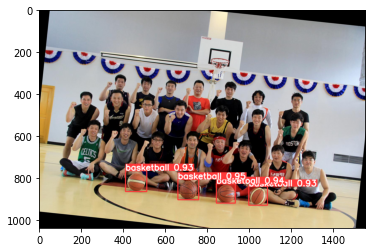

In [36]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
vid = os.path.join()

In [41]:
cap = cv2.VideoCapture('Basketball_WPI.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'